# Praca Domowa 3
Piotr Marciniak
## Wczytanie danych i modułów

In [1]:
import pandas as pd
import numpy as np

weather_df = pd.read_csv('../../australia.csv')
weather_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


## Podział na zbiór treningowy i testowy
Jako, że mamy dużo danych zastosujemy podział 60%-40% danych treningowych do danych testowych.

In [2]:
from sklearn.model_selection import train_test_split

X = weather_df.drop(columns="RainTomorrow")
y = weather_df["RainTomorrow"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Nauka klasyfikatorów

### Random Forest
Oprócz hiperparametrów poznanych na ostatnich laboratoriach zainteresował mnie parametr **max_leaf_nodes**, która określa nam maksymalną ilość liści, czyli de facto trafień do dodanych grup. Może powodować powstawanie dużo podziałów, które zachodzą dla tylko zbioru treningowego. Powinien być przydatny w razie overfittingu.

In [3]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
                            n_estimators=500, 
                            max_depth=4, 
                            min_samples_split=3,
                            max_features=4, 
                            max_leaf_nodes=13,
                            random_state=42,
                            n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=4, max_leaf_nodes=13,
                       min_samples_split=3, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [4]:
rfc_pred = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)

## XGBoost
Oprócz hiperparametrów poznanych na ostatnich laboratoriach zainteresował mnie parametr **subsample**. Mówi nam o stosunku przykładów treningowych użytych w danej boostingowej iteracji. Defaultowo jest on ustawiony na 1, czyli cały zbiór treningowy jest użyty w jednej iteracji. Ustawione tej wartości na 0.5, spowoduje losowe podzielenie zbioru na połowę. Wskazujemy frakcję naszego zbioru.

In [5]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.0001,
                    booster='gbtree', 
                    max_depth=6,
                    eval_metric="logloss", 
                    random_state=42,
                    subsample=0.8,
                    use_label_encoder=False #nie używamy enkodera sklearn'a
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0001,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [6]:
xgb_prob = xgb.predict_proba(X_test)
xgb_pred = xgb.predict(X_test)

## SVM - Support Vector Machine
Hiperparametrem, na którym się skupimy jest **kernel**, czyli funkcje według dokonujemy podziału. Możemy wybrać już z przygotowanych czyli 
* linear - liniowe,
* poly - wielomianowe,
* rbf - radial basis function jest to rodzina funkcji, w przypadku domyślnego sci-kita mamy $\exp\left(-\gamma\|x-x'\|^2\right)$, 
* sigmoid - $\tanh\left(\lambda x^T y + c\right)$,
* precomputed - możemy podać własną funkcję jądra.

Z powodu dużej ilości danych użycie Gaussowskiego jądra jest kosztowne, dlatego użyjemy wielomianowe stopnia 2.

In [7]:
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF

svc = SVC(kernel='poly', degree=2, cache_size=1000, probability=True) 
svc.fit(X_train, y_train)

SVC(cache_size=1000, degree=2, kernel='poly', probability=True)

In [8]:
svc_prob = svc.predict_proba(X_test)
svc_pred = svc.predict(X_test)

## Porównanie klasyfikatorów
Do wstępnego porównania użyjemy na początek *accuracy*. Później spojrzymy na macierz pomyłek (*confusion matrix*). W zależności od tego, jak zdefinujemy nasz problem możemy chcieć wysoki *recall* (farmerzy, których interesuje, jak przewidujemy opad deszczu, aby zaplanować koszenie traw) lub *specifity* (turyści, którym zależy na słonecznej pogodzie), dlatego użyjemy również *ROC curve*, czyli zależności od *recallu* od *specifity* może pomóc dobrać threshold.
### Accuracy

In [9]:
from sklearn.metrics import accuracy_score
pd.DataFrame([
            ("Random Forest", accuracy_score(y_true=y_test, y_pred=rfc_pred)),
            ("XGBoost", accuracy_score(y_true=y_test, y_pred=xgb_pred)),
            ("Support Vector Machine", accuracy_score(y_true=y_test, y_pred=svc_pred)),
            ], 
            columns=["Model", "Accuracy"])

,Model,Accuracy
0,Random Forest,0.843274
1,XGBoost,0.846154
2,Support Vector Machine,0.838843


Jak widzimy accuracy średnio rozróżnia nam nasze klasyfikatory (najlepsze różnią się na 3 cyfrze znaczącej).

### Confusion Matrix

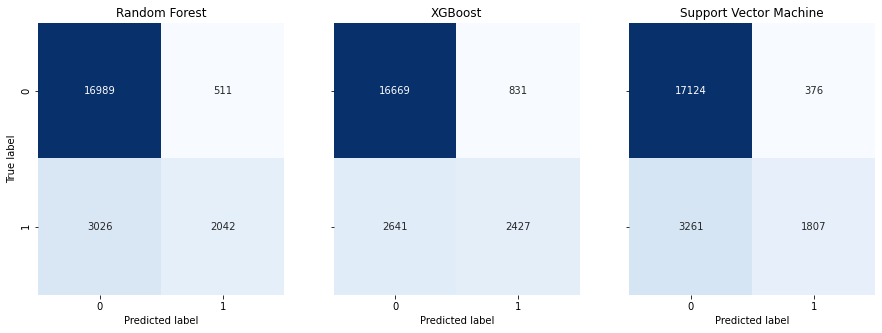

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
def plot_confusion_matrix(ax, y_true, y_pred, name):
    C = confusion_matrix(y_true, y_pred)
    sns.heatmap(C, annot=True, ax=ax, cmap='Blues', cbar=False, fmt="d")
    ax.set_title(name)
    ax.set_xlabel("Predicted label")

plot_confusion_matrix(axes[0], y_test, rfc_pred, "Random Forest")
plot_confusion_matrix(axes[1], y_test, xgb_pred, "XGBoost")
plot_confusion_matrix(axes[2], y_test, svc_pred, "Support Vector Machine")
axes[0].set_ylabel("True label")
plt.show()

Widzimy, że *XGBoost* ma najniższy recall, zatem jego zalecałbym dla farmerów, natomiast *specifity* ma najniższy SVM zatem jego zaleciłbym chcącym opalić się turystom. Zatem spójrzmy na poniższą ramkę.

In [11]:
from sklearn.metrics import recall_score, precision_score, f1_score
pd.DataFrame([
            ("Random Forest", recall_score(y_true=y_test, y_pred=rfc_pred), precision_score(y_true=y_test, y_pred=rfc_pred), f1_score(y_true=y_test, y_pred=rfc_pred)),
            ("XGBoost", recall_score(y_true=y_test, y_pred=xgb_pred), precision_score(y_true=y_test, y_pred=xgb_pred), f1_score(y_true=y_test, y_pred=xgb_pred)),
            ("Support Vector Machine", recall_score(y_true=y_test, y_pred=svc_pred), precision_score(y_true=y_test, y_pred=svc_pred), f1_score(y_true=y_test, y_pred=svc_pred)),
            ], 
            columns=["Model", "Recall", "Precision", "F1-score"])

,Model,Recall,Precision,F1-score
0,Random Forest,0.402920,0.799843,0.535888
1,XGBoost,0.478887,0.744936,0.582993
2,Support Vector Machine,0.356551,0.827760,0.498414


Z F1 widzimy, że najlepszy wynik osiągnął *XGBoost*.

### ROC curve

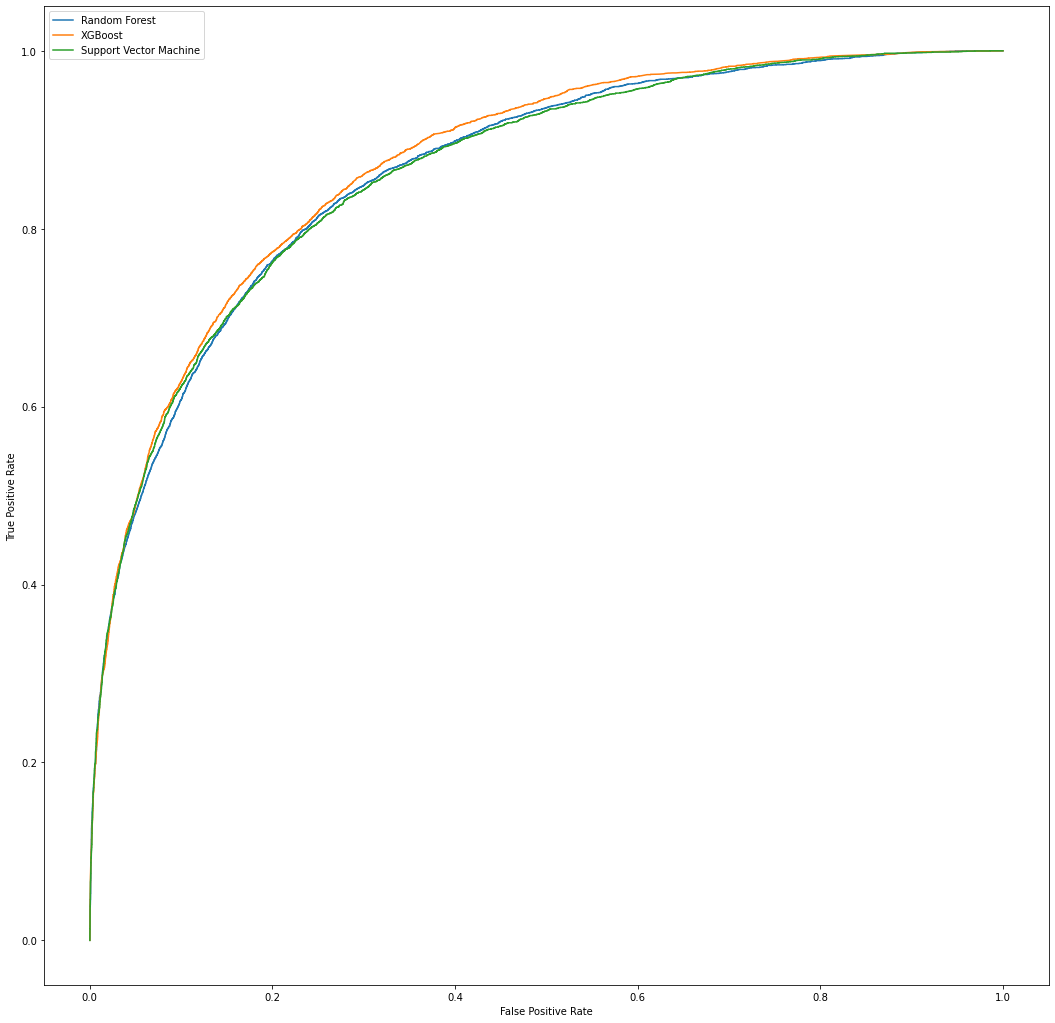

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred, name):
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=name)

plt.figure(figsize=(18,18))
plot_roc_curve(y_test, rfc_prob[:, 1], "Random Forest")
plot_roc_curve(y_test, xgb_prob[:, 1], "XGBoost")
plot_roc_curve(y_test, svc_prob[:, 1], "Support Vector Machine")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Jaki widzimy XGBoost ma najlepszą krzywą (najbliższą do idealnej).

## Wniosek
Najlepsze wyniki osiągnał XGBoost, wynika to właściwe ze wszystkich użytych metryk.